## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  29.606678   652.069451  0.841878  1.590209  1.568784
1  24.542257   858.962473  0.648745  5.531014  1.444227
2  51.446241   384.181109  0.951099  5.197907  1.380543
3  69.211547  1000.836728  0.842023  1.787758  1.478554
4  51.183255  1621.687684  0.643961  2.170587  1.636194


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 0.9604661	total: 56.6ms	remaining: 56.6s
1:	learn: 0.9493828	total: 58ms	remaining: 28.9s
2:	learn: 0.9378723	total: 59.3ms	remaining: 19.7s
3:	learn: 0.9273281	total: 60.4ms	remaining: 15s
4:	learn: 0.9151042	total: 61.2ms	remaining: 12.2s
5:	learn: 0.9024861	total: 61.8ms	remaining: 10.2s
6:	learn: 0.8914224	total: 62.4ms	remaining: 8.85s
7:	learn: 0.8788609	total: 63.1ms	remaining: 7.82s
8:	learn: 0.8690609	total: 63.6ms	remaining: 7.01s
9:	learn: 0.8601410	total: 65.3ms	remaining: 6.46s
10:	learn: 0.8491259	total: 65.9ms	remaining: 5.92s
11:	learn: 0.8384621	total: 66.5ms	remaining: 5.47s
12:	learn: 0.8276098	total: 67ms	remaining: 5.08s
13:	learn: 0.8197992	total: 67.6ms	remaining: 4.76s
14:	learn: 0.8087178	total: 68.2ms	remaining: 4.48s
15:	learn: 0.7980458	total: 69.5ms	remaining: 4.27s
16:	learn: 0.7879803	total: 70.4ms	remaining: 4.07s
17:	learn: 0.7804549	total: 71.3ms	remaining: 3.89s
18:	learn: 0.7712659	total: 72ms	remaining: 3.72s


24:	learn: 0.7149616	total: 75.7ms	remaining: 2.95s
25:	learn: 0.7077239	total: 76.6ms	remaining: 2.87s
26:	learn: 0.7009884	total: 77.1ms	remaining: 2.78s
27:	learn: 0.6911236	total: 77.7ms	remaining: 2.7s
28:	learn: 0.6833573	total: 78.5ms	remaining: 2.63s
29:	learn: 0.6743116	total: 79ms	remaining: 2.55s
30:	learn: 0.6671967	total: 79.5ms	remaining: 2.48s
31:	learn: 0.6604918	total: 80.1ms	remaining: 2.42s
32:	learn: 0.6532348	total: 80.6ms	remaining: 2.36s
33:	learn: 0.6482127	total: 81.1ms	remaining: 2.3s
34:	learn: 0.6399453	total: 81.6ms	remaining: 2.25s
35:	learn: 0.6334173	total: 81.9ms	remaining: 2.19s
36:	learn: 0.6258776	total: 82.4ms	remaining: 2.14s
37:	learn: 0.6190124	total: 82.9ms	remaining: 2.1s
38:	learn: 0.6120188	total: 83.5ms	remaining: 2.06s
39:	learn: 0.6042843	total: 84.1ms	remaining: 2.02s
40:	learn: 0.5982385	total: 84.7ms	remaining: 1.98s
41:	learn: 0.5915779	total: 85.1ms	remaining: 1.94s
42:	learn: 0.5831184	total: 85.4ms	remaining: 1.9s
43:	learn: 0.57550

201:	learn: 0.1829345	total: 153ms	remaining: 604ms
202:	learn: 0.1819506	total: 153ms	remaining: 602ms
203:	learn: 0.1810561	total: 154ms	remaining: 601ms
204:	learn: 0.1801327	total: 154ms	remaining: 599ms
205:	learn: 0.1790626	total: 155ms	remaining: 597ms
206:	learn: 0.1785702	total: 155ms	remaining: 595ms
207:	learn: 0.1777721	total: 156ms	remaining: 593ms
208:	learn: 0.1769691	total: 156ms	remaining: 591ms
209:	learn: 0.1764347	total: 156ms	remaining: 589ms
210:	learn: 0.1759616	total: 157ms	remaining: 587ms
211:	learn: 0.1753197	total: 157ms	remaining: 584ms
212:	learn: 0.1744918	total: 157ms	remaining: 582ms
213:	learn: 0.1737342	total: 158ms	remaining: 580ms
214:	learn: 0.1731707	total: 158ms	remaining: 578ms
215:	learn: 0.1723774	total: 159ms	remaining: 576ms
216:	learn: 0.1719103	total: 159ms	remaining: 574ms
217:	learn: 0.1714136	total: 160ms	remaining: 572ms
218:	learn: 0.1707030	total: 160ms	remaining: 570ms
219:	learn: 0.1698302	total: 160ms	remaining: 568ms
220:	learn: 

382:	learn: 0.0917295	total: 225ms	remaining: 362ms
383:	learn: 0.0915724	total: 226ms	remaining: 362ms
384:	learn: 0.0910968	total: 226ms	remaining: 361ms
385:	learn: 0.0906318	total: 227ms	remaining: 360ms
386:	learn: 0.0904982	total: 227ms	remaining: 360ms
387:	learn: 0.0900016	total: 227ms	remaining: 359ms
388:	learn: 0.0895516	total: 228ms	remaining: 358ms
389:	learn: 0.0894217	total: 228ms	remaining: 357ms
390:	learn: 0.0889414	total: 229ms	remaining: 356ms
391:	learn: 0.0888143	total: 229ms	remaining: 355ms
392:	learn: 0.0883794	total: 230ms	remaining: 355ms
393:	learn: 0.0882377	total: 230ms	remaining: 354ms
394:	learn: 0.0877736	total: 231ms	remaining: 353ms
395:	learn: 0.0876521	total: 231ms	remaining: 352ms
396:	learn: 0.0872318	total: 231ms	remaining: 351ms
397:	learn: 0.0868905	total: 232ms	remaining: 351ms
398:	learn: 0.0866036	total: 232ms	remaining: 350ms
399:	learn: 0.0862021	total: 233ms	remaining: 349ms
400:	learn: 0.0860709	total: 233ms	remaining: 348ms
401:	learn: 

588:	learn: 0.0500277	total: 313ms	remaining: 218ms
589:	learn: 0.0497873	total: 313ms	remaining: 218ms
590:	learn: 0.0496850	total: 314ms	remaining: 217ms
591:	learn: 0.0495280	total: 314ms	remaining: 217ms
592:	learn: 0.0493372	total: 315ms	remaining: 216ms
593:	learn: 0.0491838	total: 316ms	remaining: 216ms
594:	learn: 0.0491585	total: 316ms	remaining: 215ms
595:	learn: 0.0489714	total: 317ms	remaining: 215ms
596:	learn: 0.0488205	total: 317ms	remaining: 214ms
597:	learn: 0.0487956	total: 317ms	remaining: 213ms
598:	learn: 0.0485676	total: 318ms	remaining: 213ms
599:	learn: 0.0483867	total: 319ms	remaining: 213ms
600:	learn: 0.0482395	total: 319ms	remaining: 212ms
601:	learn: 0.0480192	total: 320ms	remaining: 211ms
602:	learn: 0.0479191	total: 320ms	remaining: 211ms
603:	learn: 0.0477753	total: 321ms	remaining: 210ms
604:	learn: 0.0476004	total: 321ms	remaining: 210ms
605:	learn: 0.0473752	total: 321ms	remaining: 209ms
606:	learn: 0.0473508	total: 322ms	remaining: 208ms
607:	learn: 

751:	learn: 0.0343084	total: 386ms	remaining: 127ms
752:	learn: 0.0342733	total: 386ms	remaining: 127ms
753:	learn: 0.0342563	total: 387ms	remaining: 126ms
754:	learn: 0.0342242	total: 387ms	remaining: 126ms
755:	learn: 0.0341984	total: 388ms	remaining: 125ms
756:	learn: 0.0341640	total: 388ms	remaining: 125ms
757:	learn: 0.0341418	total: 388ms	remaining: 124ms
758:	learn: 0.0340328	total: 389ms	remaining: 123ms
759:	learn: 0.0339108	total: 389ms	remaining: 123ms
760:	learn: 0.0338794	total: 389ms	remaining: 122ms
761:	learn: 0.0337523	total: 390ms	remaining: 122ms
762:	learn: 0.0337215	total: 390ms	remaining: 121ms
763:	learn: 0.0336034	total: 390ms	remaining: 121ms
764:	learn: 0.0334813	total: 391ms	remaining: 120ms
765:	learn: 0.0334651	total: 391ms	remaining: 120ms
766:	learn: 0.0334436	total: 391ms	remaining: 119ms
767:	learn: 0.0333598	total: 392ms	remaining: 118ms
768:	learn: 0.0333095	total: 392ms	remaining: 118ms
769:	learn: 0.0332885	total: 393ms	remaining: 117ms
770:	learn: 

886:	learn: 0.0234211	total: 451ms	remaining: 57.5ms
887:	learn: 0.0233113	total: 452ms	remaining: 57.1ms
888:	learn: 0.0232821	total: 453ms	remaining: 56.6ms
889:	learn: 0.0232413	total: 454ms	remaining: 56.1ms
890:	learn: 0.0232082	total: 455ms	remaining: 55.6ms
891:	learn: 0.0231798	total: 455ms	remaining: 55.1ms
892:	learn: 0.0230038	total: 456ms	remaining: 54.6ms
893:	learn: 0.0229730	total: 456ms	remaining: 54.1ms
894:	learn: 0.0228012	total: 457ms	remaining: 53.6ms
895:	learn: 0.0226334	total: 457ms	remaining: 53.1ms
896:	learn: 0.0226030	total: 458ms	remaining: 52.5ms
897:	learn: 0.0225686	total: 462ms	remaining: 52.4ms
898:	learn: 0.0224437	total: 463ms	remaining: 52ms
899:	learn: 0.0224097	total: 463ms	remaining: 51.5ms
900:	learn: 0.0223762	total: 464ms	remaining: 51ms
901:	learn: 0.0222773	total: 465ms	remaining: 50.5ms
902:	learn: 0.0221658	total: 466ms	remaining: 50ms
903:	learn: 0.0220571	total: 467ms	remaining: 49.5ms
904:	learn: 0.0218983	total: 467ms	remaining: 49ms
9

952:	learn: 0.0187945	total: 504ms	remaining: 24.8ms
953:	learn: 0.0187143	total: 504ms	remaining: 24.3ms
954:	learn: 0.0186246	total: 504ms	remaining: 23.8ms
955:	learn: 0.0186004	total: 505ms	remaining: 23.2ms
956:	learn: 0.0185224	total: 505ms	remaining: 22.7ms
957:	learn: 0.0184350	total: 506ms	remaining: 22.2ms
958:	learn: 0.0184114	total: 506ms	remaining: 21.6ms
959:	learn: 0.0183362	total: 507ms	remaining: 21.1ms
960:	learn: 0.0182512	total: 507ms	remaining: 20.6ms
961:	learn: 0.0182282	total: 507ms	remaining: 20ms
962:	learn: 0.0181339	total: 512ms	remaining: 19.7ms
963:	learn: 0.0180688	total: 512ms	remaining: 19.1ms
964:	learn: 0.0179866	total: 513ms	remaining: 18.6ms
965:	learn: 0.0179062	total: 514ms	remaining: 18.1ms
966:	learn: 0.0178430	total: 515ms	remaining: 17.6ms
967:	learn: 0.0177799	total: 516ms	remaining: 17ms
968:	learn: 0.0177183	total: 516ms	remaining: 16.5ms
969:	learn: 0.0176570	total: 518ms	remaining: 16ms
970:	learn: 0.0175793	total: 518ms	remaining: 15.5ms

971:	learn: 0.0175196	total: 519ms	remaining: 14.9ms
972:	learn: 0.0174624	total: 519ms	remaining: 14.4ms
973:	learn: 0.0173868	total: 519ms	remaining: 13.9ms
974:	learn: 0.0173288	total: 520ms	remaining: 13.3ms
975:	learn: 0.0172759	total: 520ms	remaining: 12.8ms
976:	learn: 0.0172024	total: 521ms	remaining: 12.3ms
977:	learn: 0.0171443	total: 521ms	remaining: 11.7ms
978:	learn: 0.0170881	total: 522ms	remaining: 11.2ms
979:	learn: 0.0170443	total: 522ms	remaining: 10.7ms
980:	learn: 0.0169906	total: 523ms	remaining: 10.1ms
981:	learn: 0.0169562	total: 525ms	remaining: 9.63ms


982:	learn: 0.0169018	total: 526ms	remaining: 9.11ms
983:	learn: 0.0168855	total: 528ms	remaining: 8.58ms
984:	learn: 0.0168694	total: 528ms	remaining: 8.04ms
985:	learn: 0.0168400	total: 528ms	remaining: 7.5ms
986:	learn: 0.0167974	total: 529ms	remaining: 6.97ms
987:	learn: 0.0167642	total: 530ms	remaining: 6.43ms
988:	learn: 0.0167140	total: 531ms	remaining: 5.9ms
989:	learn: 0.0166819	total: 531ms	remaining: 5.37ms
990:	learn: 0.0166609	total: 532ms	remaining: 4.83ms
991:	learn: 0.0166449	total: 533ms	remaining: 4.3ms
992:	learn: 0.0166138	total: 534ms	remaining: 3.76ms
993:	learn: 0.0165930	total: 534ms	remaining: 3.23ms
994:	learn: 0.0165435	total: 535ms	remaining: 2.69ms
995:	learn: 0.0165277	total: 536ms	remaining: 2.15ms
996:	learn: 0.0164865	total: 536ms	remaining: 1.61ms
997:	learn: 0.0164661	total: 537ms	remaining: 1.07ms
998:	learn: 0.0164358	total: 537ms	remaining: 537us
999:	learn: 0.0164156	total: 540ms	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.4630179725809346


ABC Pre-generator MAE 0.4666721910789448


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

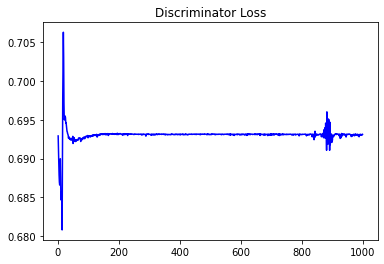

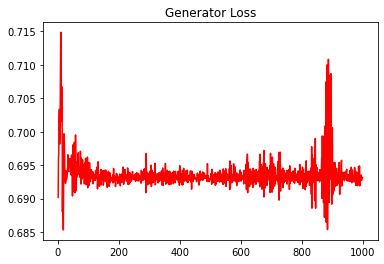

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.47046355467289686


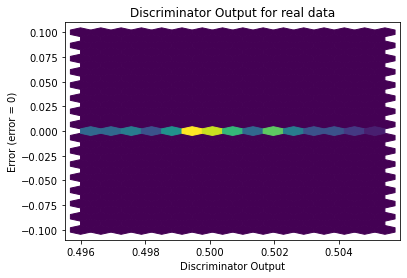

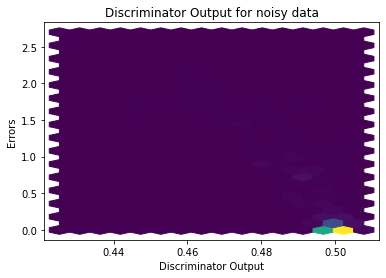

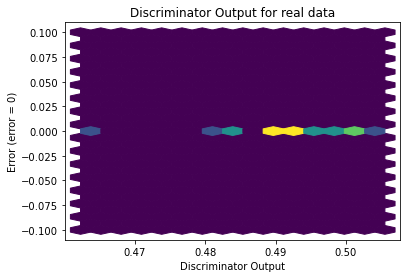

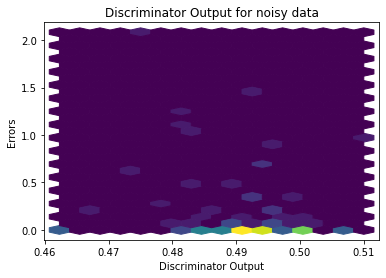

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

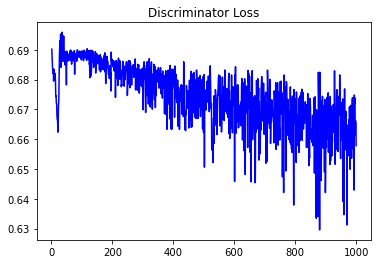

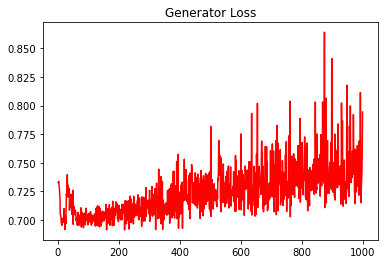

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.6480939675197005


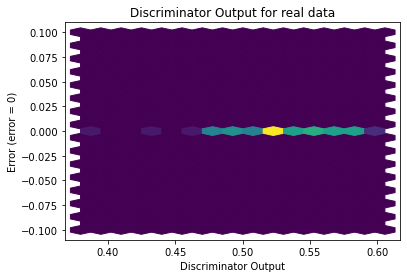

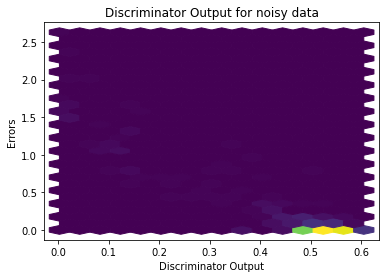

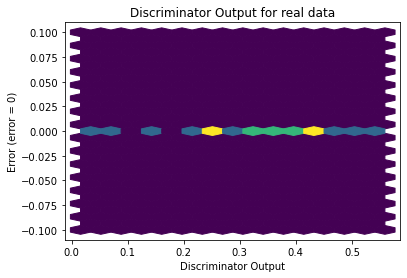

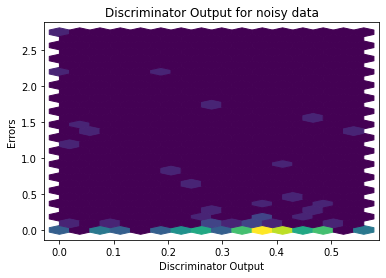

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


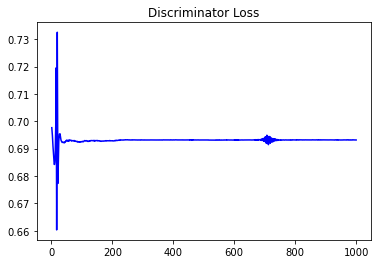

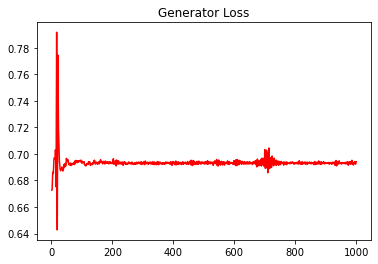

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.49183359181648123


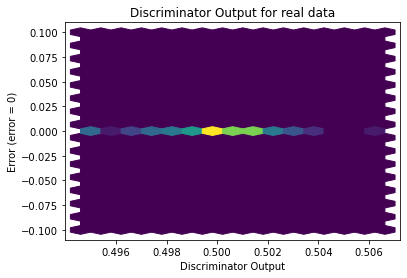

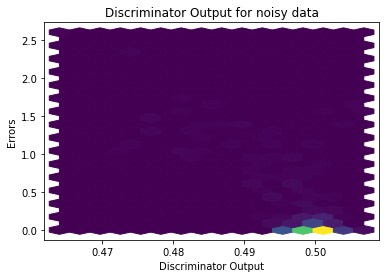

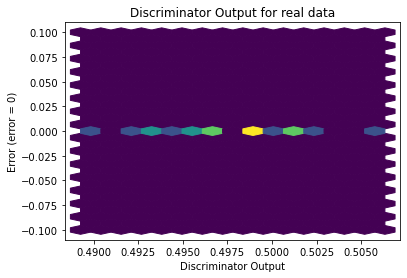

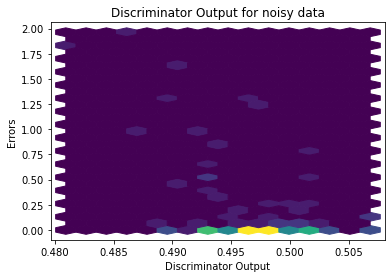

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


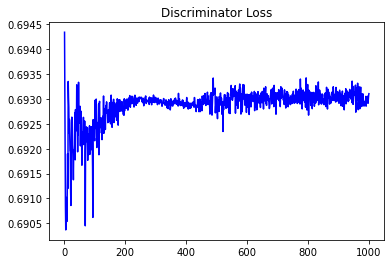

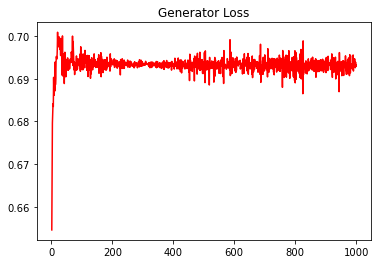

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.46760248981881886


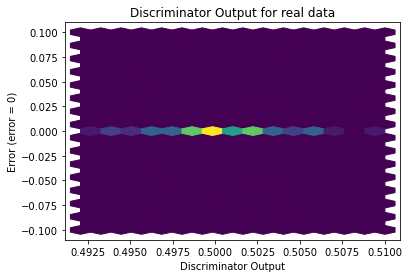

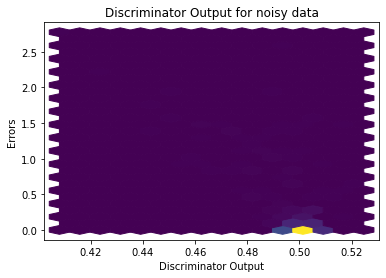

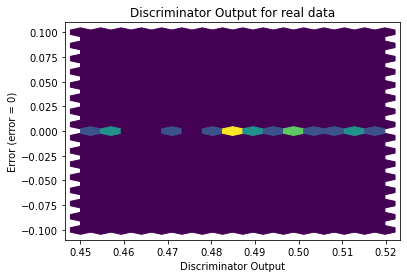

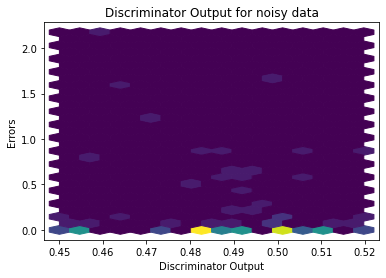

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.5238]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0363]], requires_grad=True)
